In [1]:
import Pkg; Pkg.add(["Plots", "Interact"]);
import Logging; Logging.disable_logging(Logging.Info)

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/srv/rep/22-course-cse6643/mybinder/Project.toml`
  No Changes to `~/srv/rep/22-course-cse6643/mybinder/Manifest.toml`


LogLevel(1)

In [2]:
const STATIC_LECTURE = false;

In [3]:
function draw(plt)
    if STATIC_LECTURE
        filename = Base.Filesystem.tempname() * ".png"
        savefig(filename)
        return display("image/png", read(filename))
    else
        return plt
    end
end

draw (generic function with 1 method)

In [4]:
using LinearAlgebra;
using Plots; default(l=2, size=(900,550), label=false);
using Interact;

imshow(x, _clim=:nothing) = heatmap(x
    , aspect_ratio=:equal
    , framestyle=:none
    , yflip=true
    , c=:diverging_gwv_55_95_c39_n256
    , clim=if _clim != :nothing
          _clim
      elseif maximum(abs.(x)) > 1.e-12
          (-maximum(abs.(x)),maximum(abs.(x)))
      else 
          (-1,1)
      end
    , size=(500,500)
)

WebIO._IJuliaInit()

imshow (generic function with 2 methods)

### Warmup (T&B Exercise 7.3)

Let $A$ be an $m \times m$ matrix, and let $a_j$ be its $j$th column.  Give an algebraic proof of _Hadamard's inequality_:

$$|\det A| \leq \prod_{j=1}^m \| a_j \|_2.$$

Also give a geometric interpretation of this result, making use of the fact that the determinant equals the volume of a parallelipiped.

Hints:

- $|\det A| = |\det (QR)| = |\det(Q)| |\det(R)|$
- How does $|r_{jj}|$ compare to $\|a_j\|_2$?

## Review

### Classical Gram-Schmidt vs. Modified Gram-Schmidt

In [5]:
function cgs(A)
    _, n = size(A); Q = copy(A);
    R = zeros(eltype(A), n, n)
    for j in 1:n
        R[1:j-1,j] = Q[:,1:j-1]' * Q[:,j]
        Q[:,j] -= Q[:,1:j-1] * R[1:j-1,j]
        R[j,j] = norm(Q[:,j])
        Q[:,j] /= R[j,j]
    end
    return Q, R
end;

In [6]:
function mgs(A)
    _, n = size(A); Q = copy(A);
    R = zeros(eltype(A), n, n)
    for i in 1:n
        R[i,i] = norm(Q[:,i])
        Q[:,i] /= R[i,i]
        R[i,i+1:n] = Q[:,i]' * Q[:,i+1:n]
        Q[:,i+1:n] -= Q[:,[i]] * R[[i],i+1:n]
    end
    return Q, R
end;

Plots.AnimatedGif("/home/tisaac/srv/rep/22-course-cse6643/mybinder/tmp.gif")
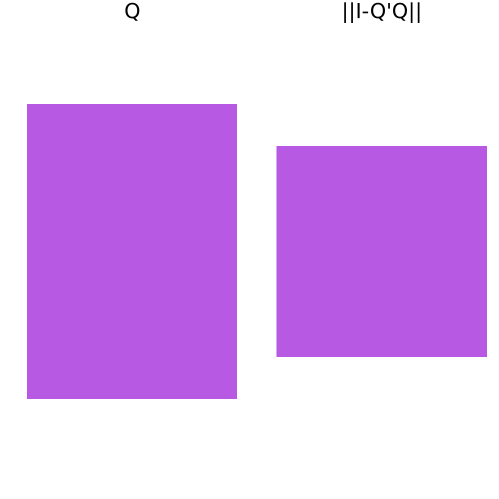

In [7]:
m = 7; n = 5;
Q = ones(m,n);
err = ones(n,n);
anim = Animation()
function q_frame!(Q, E, anim)
    qplot = imshow(Q)
    plot!(qplot, colorbar=:legend, legend=false, title="Q")
    eplot = imshow(E)
    plot!(eplot, colorbar=:legend, legend=false, title="||I-Q'Q||")
    p = plot(qplot, eplot, layout=(1,2))
    frame(anim, p)
end
q_frame!(Q, err, anim)
for j in 1:n
    Q[:,j] .= -1.0+0.01
    err[1:j,1:j] .= 0
    q_frame!(Q, err, anim)
end
q_frame!(Q, err, anim)
gif(anim, fps=0.5)

Plots.AnimatedGif("/home/tisaac/srv/rep/22-course-cse6643/mybinder/tmp.gif")
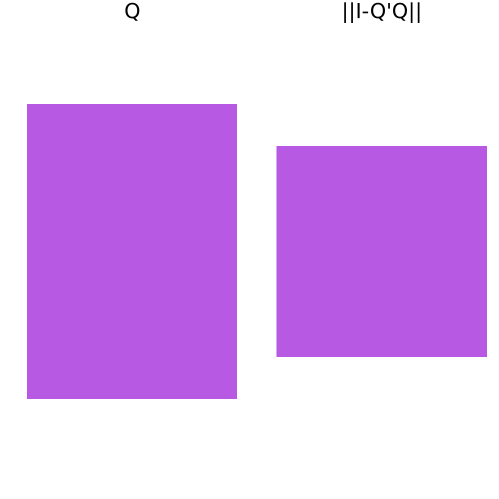

In [8]:
Q = ones(m,n);
err = ones(n,n);
anim = Animation()
q_frame!(Q, err, anim)
for j in 1:n
    Q[:,j] .= -1+0.02
    Q[:,j+1:n] .= 1.0
    Q[(mod(j,2)+1):2:end,j+1:n] .-= 0.1 
    err[j,:] .= 0
    err[:,j] .= 0
    q_frame!(Q, err, anim)
end
q_frame!(Q, err, anim)
gif(anim, fps=0.5)

### Both algorithms construct $\hat{Q}$ by a sequence of triangular factorizations $Z_i$

"Classical Gram-Schmidt"

Plots.AnimatedGif("/home/tisaac/srv/rep/22-course-cse6643/mybinder/tmp.gif")
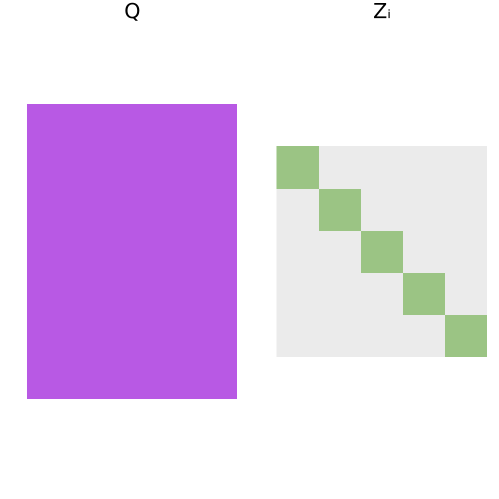

In [9]:
m = 7; n = 5;
Q = ones(m,n);
U = -0.5*Matrix(1.0*I,n,n);
anim = Animation();
function u_frame!(Q, U, anim)
    qplot = imshow(Q)
    plot!(qplot, colorbar=:legend, legend=false, title="Q")
    eplot = imshow(U, (-1,1))
    plot!(eplot, colorbar=:legend, legend=false, title="Zᵢ")
    p = plot(qplot, eplot, layout=(1,2))
    frame(anim, p)
end
u_frame!(Q, U, anim)
for j in 1:n
    Q[:,j] .= -1.0+0.01
    U[:,:] = -0.5*Matrix(1.0*I,n,n)
    U[j,j] = 1.0
    U[1:j-1,j] .= -1.0
    u_frame!(Q, U, anim)
end
u_frame!(Q, U, anim)
display("Classical Gram-Schmidt")
gif(anim, fps=0.5)

"Modified Gram-Schmidt"

Plots.AnimatedGif("/home/tisaac/srv/rep/22-course-cse6643/mybinder/tmp.gif")
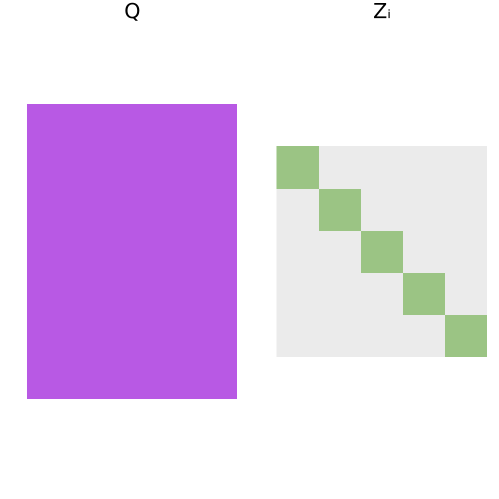

In [10]:
m = 7; n = 5;
Q = ones(m,n);
U = -0.5*Matrix(1.0*I,n,n);
anim = Animation();
u_frame!(Q, U, anim)
for j in 1:n
    Q[:,j:end] .= 1.0
    Q[:,j] .= -1.0+0.01
    Q[(mod(j,2)+1):2:end,j+1:end] .-= 0.1
    U[:,:] = -0.5*Matrix(1.0*I,n,n)
    U[j,j] = 1.0
    U[j,j+1:n] .= -1.0
    u_frame!(Q, U, anim)
end
u_frame!(Q, U, anim)
display("Modified Gram-Schmidt")
gif(anim, fps=0.5)

### CGS is unstable; MGS is better but not as good as `qr`

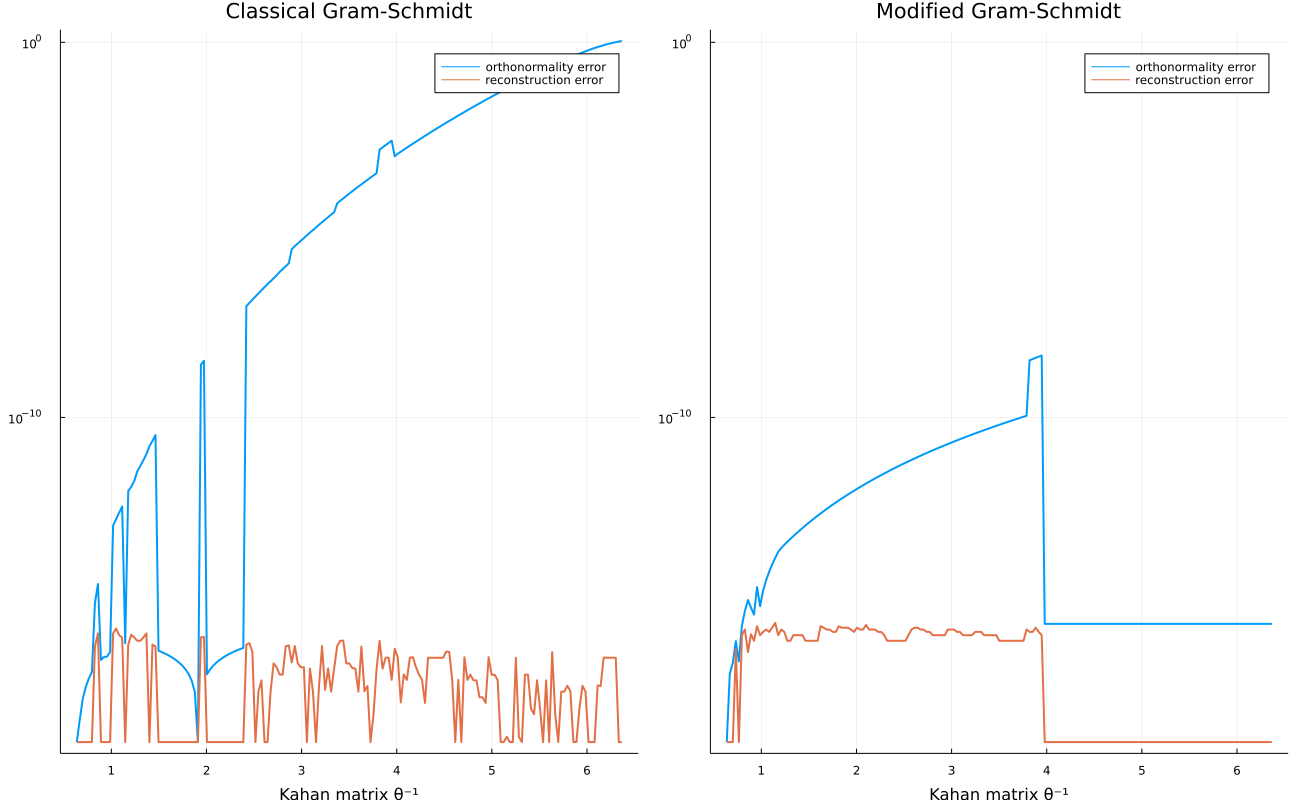

In [11]:
function kahan(m, θ)
    s = sin(θ)
    c = cos(θ)
    S = Diagonal(s .^ collect(0:m-1))
    K = UnitUpperTriangular(-c * ones(m,m))
    return S * K
end
orthonormality_error(Q) = norm(I - Q[:,:]' * Q[:,:], 2)
reconstruction_error(A, Q, R) = norm(A - Q * R, 2)
ortho_errs_cgs = Float64[]
recon_errs_cgs = Float64[]
ortho_errs_mgs = Float64[]
recon_errs_mgs = Float64[]
rang = π ./ (2:.1:20)
for θ in rang
    M = kahan(10, θ)
    ϕ = eps(Float64)
    M_p = copy(M[:,:])
    rot = [cos(ϕ) sin(ϕ); -sin(ϕ) cos(ϕ)]
    M_p[1:2,:] = rot * M[1:2,:]
    Q_cgs, R_cgs = cgs(M_p)
    Q_mgs, R_mgs = mgs(M_p)
    push!(ortho_errs_cgs, orthonormality_error(Q_cgs))
    push!(recon_errs_cgs, reconstruction_error(M_p, Q_cgs, R_cgs))
    push!(ortho_errs_mgs, orthonormality_error(Q_mgs))
    push!(recon_errs_mgs, reconstruction_error(M_p, Q_mgs, R_mgs))
end
ymin=Inf
ymax=0.
for series in [ortho_errs_cgs, ortho_errs_mgs, recon_errs_cgs, recon_errs_mgs]
    series[:] = max.(series[:], 0.001*eps())
    ymin = min(ymin, minimum(series))
    ymax = max(ymax, maximum(series))
end
ymin *= 0.5
ymax *= 2.0
p1 = plot( rang .^-1, [ortho_errs_cgs recon_errs_cgs]
    , yscale=:log10
    , label=["orthonormality error" "reconstruction error"]
    , xlabel="Kahan matrix θ⁻¹"
    , title="Classical Gram-Schmidt"
    , size=(1300,800)
    , ylim=(ymin,ymax)
)
p2 = plot( rang .^-1, [ortho_errs_mgs recon_errs_mgs]
    , yscale=:log10
    , label=["orthonormality error" "reconstruction error"]
    , xlabel="Kahan matrix θ⁻¹"
    , title="Modified Gram-Schmidt"
    , size=(1300,800)
    , ylim=(ymin,ymax)
)
draw(plot(p1,p2,layout=(1,2)))

### Rounding errors affect the orthogonality error

If we start with $\hat{R}^{(0)} = I$ and $\hat{Q}^{(0)} = A$, step $i$ is like

$$
A = \hat{Q}^{(i-1)} \hat{R}^{(i-1)} = \hat{Q}^{(i-1)} Z_{i} Z_{i}^{-1} \hat{R}^{(i-1)} = \underbrace{(\hat{Q}^{(i-1)} Z_{i})}_{\hat{Q}^{(i)}} \underbrace{(Z_i^{-1} \hat{R}^{(i-1)})}_{\hat{R}^{(i)}}.$$

- We saw last time that rounding errors have the biggest effect when

$$|r_{ii}| \ll \max_j |r_{ji}|$$

- When this happens

$$\underbrace{\|Z_i\|_2 \|Z_i^{-1}\|_2}_{\text{(condition number of } Z_i\text{)}} \gg 1$$

- **Matrices with large condition numbers blow-up rounding errors**

**Exercise:**  What type of matrix $Y$ has

$$\|Y\|_2 \|Y^{-1}\|_2 = 1?$$

### Householder QR: produce a _full QR factorization_ by  _unitary transformations_ to $R$

- Start with $Q^{(0)} = I$ and $R^{(0)} = A$

- At step $i$: $\quad \quad A = Q^{(i-1)} R^{(i-1)} = Q^{(i-1)} U_i^{-1} U_i R^{(i-1)} = \underbrace{(Q^{(i-1)} U_{i-1}^*)}_{Q^{(i)}} \underbrace{(U_{i-1} R^{(i-1)})}_{R^{(i)}}$

Plots.AnimatedGif("/home/tisaac/srv/rep/22-course-cse6643/mybinder/tmp.gif")
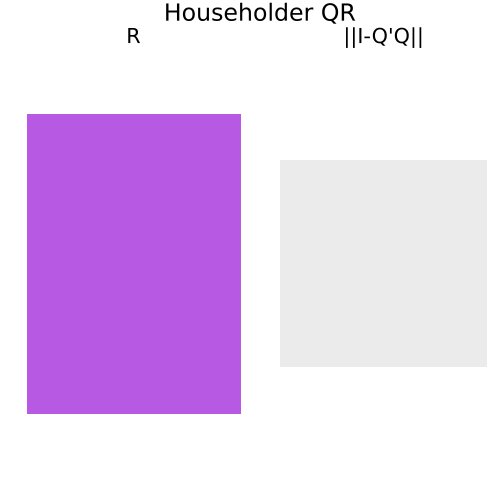

In [12]:
m = 7; n = 5;
R = ones(m,n);
E = zeros(n,n);
anim = Animation();
function h_frame!(R, E, anim)
    rplot = imshow(R)
    plot!(rplot, colorbar=:legend, legend=false, title="R")
    eplot = imshow(E, (-1,1))
    plot!(eplot, colorbar=:legend, legend=false, title="||I-Q'Q||")
    p = plot(rplot, eplot, layout=(1,2), plot_title="Householder QR")
    frame(anim, p)
end
h_frame!(R, E, anim)
for j in 1:n
    R[:] = ones(m,n)
    R[j:2:end,:] .-= 0.1
    R[1:j,:] .= -1.0 + 0.01
    for i in 1:j
        R[i+1:end,i] .= 0.
    end
    h_frame!(R, E, anim)
end
h_frame!(R, E, anim)
gif(anim, fps=0.5)

- $I - Q^{(i)*} Q^{(i)} = 0\ $ **at each step** because $Q^{(i)} = Q^{(i-1)} U_i$, and

$$\text{unitary} \cdot \text{unitary} = \text{unitary}$$

> Gram-Schmidt: triangular orthogonalization
>
> Householder: orthogonal triangularization

## Householder QR: how it's done

### Consider the first step

$$R^{(1)} \gets U_1 R^{(0)}$$

- Action on the left $\Rightarrow$ acts on the rows $\Rightarrow$ same action applied to each column

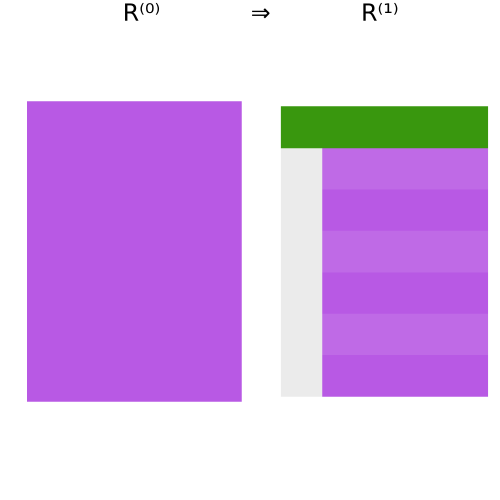

In [13]:
m = 7; n = 5;
R0 = ones(m, n);
R1 = ones(m, n);
R1[2:2:end,:] .-= 0.1;
R1[1,:] .= -1;
R1[2:end,1] .= 0;
plot(imshow(R0), imshow(R1), colorbar=false, layout=(1,2), plot_title ="R⁽⁰⁾            ⇒            R⁽¹⁾")

- We want an action such that

$$U_1 \underbrace{r_1^{(0)}}_{a_1} = \alpha e_1$$

If

$$
U_1 r_1^{(0)} = \alpha e_1,
$$

what can $\alpha$ be?

(Hint: unitary transformations preserve the 2-norm)

$$ \|\alpha e_1\|_2 = \| U_1 r_1^{(0)} \|_2 = \| r_1^{(0)} \|_2$$

$$ \|\alpha e_1 \|_2 = |\alpha| \|e_1\|_2 = |\alpha|$$

$$ \Rightarrow |\alpha| = \| r_1^{(0)} \|_2 $$

### Geometrically

In $\mathbb{R}$, there are only two possibilities:

### The simplest unitary matrix that maps $a_1$ into $\mathrm{span}\{e_1\}$ is a _Householder reflector_

First defined algebraically:

$$
\begin{aligned}
\phi &= \mathrm{sign}(a_{11}) & [(\phi e_1)^* a_1 = |a_{11}|]
\\
\tilde{u}_1 &= \frac{\overbrace{-\phi \|a_1\| e_1}^{\text{target}} - a_1}{2} & \text{[half the difference]} \\
\tilde{v}_1 &= \frac{-\phi \|a_1\| e_1 + a_1}{2} & \text{[midpoint]} \\
u_1 &= \frac{\tilde{u}_1}{\|\tilde{u}_1\|} \\
U_1 &= I - 2 u_1 u_1^*
\end{aligned}
$$

- $\tilde{v}_1 + \tilde{u}_1 = -\phi \|a_1\| e_1$

- $\tilde{v}_1 - \tilde{u}_1 = a_1$

- $\tilde{u}_1$ and $\tilde{v}_1$ are orthogonal: $\tilde{u}_1^* \tilde{v}_1$ =

$$\begin{gather}
\frac{1}{4}(\|a_1\|^2 \underbrace{(\phi e_1)^*(\phi e_1)}_{1} \\ - \|a_1\| \underbrace{(\phi e_1)^* a_1}_{|a_{11}|}  + \|a_1\| \underbrace{a_1^*(\phi e_1)}_{|a_{11}|}\\  - a_1^* a_1) \\ = 0\end{gather}$$

### Claim: $U_1$ is unitary and $U_1 a_1 = - \phi \|a_1\|e_1$

_Proof._

$$
\begin{aligned}
\phi &= \mathrm{sign}(a_{11}) & [(\phi e_1)^* a_1 = |a_{11}|]
\\
\tilde{u}_1 &= \frac{-\phi \|a_1\| e_1 - a_1}{2} \\
\tilde{v}_1 &= \frac{-\phi \|a_1\| e_1 + a_1}{2} \\
u_1 &= \frac{\tilde{u}_1}{\|\tilde{u}_1\|} \\
U_1 &= I - 2 u_1 u_1^*
\end{aligned}
$$

- $U_1$ is unitary because it is equal to $(I - 2P_1)$ where $P_1$ is the orthogonal projector onto $\mathrm{span}\{u_1\}$.

- $U_1 \tilde{u}_1 = (I - 2P_1) \tilde{u}_1 = \tilde{u}_1 - 2 \underbrace{P_1 \tilde{u}_1}_{\tilde{u}_1} = - \tilde{u}_1$
- $U_1 \tilde{v}_1 = (I - 2P_1) \tilde{v}_1
= \tilde{v}_1 - 2 \underbrace{P_1 \tilde{v}_1}_{0} = \tilde{v}_1$

$$\Rightarrow U_1 a_1 = U_1 (\tilde v_1 - \tilde u_1) = \tilde v_1 + \tilde u_1 = -\phi \|a_1\|e_1$$

### Geometrically



### Exercise (T&B Exercise 10.1)

Determine the (a) eigenvalues, (b) determinant, and (c) singular values of a Householder reflector.



### In action

In [14]:
function householder_vector(x)
    """
    Compute the vector of the Householder
    reflector that sends x to a multiple of
    e₁
    """
    u = copy(x)
    xnorm = norm(x)
    phi = sign(u[1])
    u[1] += phi * xnorm # u = x + sign(x₁)||x|| e₁
    unorm = norm(u)
    u /= unorm
    return u
end

householder_vector (generic function with 1 method)

In [15]:
function householder_reflect(u,v)
    """
    Apply the Householder reflector defined by
    u to v
    """
    return v - 2*u*(u'*v)
end

householder_reflect (generic function with 1 method)

In [16]:
function householder_reflect_left(vstar,u)
    """
    Apply the Householder reflector defined by
    u to row vector vstar
    """
    return vstar - 2*(vstar*u)*u'
end

householder_reflect_left (generic function with 1 method)

### Why $x \mapsto - \mathrm{sign}(x_1)\|x\|_2 e_1$ and not $x \mapsto \mathrm{sign}(x_1)\|x\|_2 e_1$?

In [17]:
function householder_vector(x)
    u = copy(x)
    xnorm = norm(x)
    phi = sign(u[1])
    u[1] += phi * xnorm #  |u[1]| ≥  |x[1]|
    unorm = norm(u)     # || u || ≥ || x ||
    u /= unorm # errors in denominator here
    return u
end;

In [18]:
function householder_vector_unstable(x)
    u = copy(x)
    xnorm = norm(x)
    phi = sign(u[1])
    u[1] -= phi * xnorm #  |u[1]| ≤  |x[1]|
    unorm = norm(u)     # || u || ≤ || x ||
    u /= unorm # errors in denominator here
    return u
end;

Suppose we have made a previous error and in place of $x_1$ we have $x_1 + \delta$:

$$u_1 \gets (x_1+\delta) + \mathrm{sign}(x_1) \|x\|; \quad \check u_1 \gets (x_1 + \delta) - \mathrm{sign}(x_1) \|x\|.$$

In either case we have a $|\delta|$ error in $u_1$ or $\check u_1$, but it is a larger _relative error_ for $\check u_1$ than $u_1$:

$$ \frac{|\delta|}{\underbrace{|u_1|}_{|x_1| + \|x\|}} \leq \frac{|\delta|}{\underbrace{|\check u_1|}_{|x_1| - \|x\|}} $$

This matters when we normalize by $\|u\|$ on line 7.

### From step 1 to step $j$

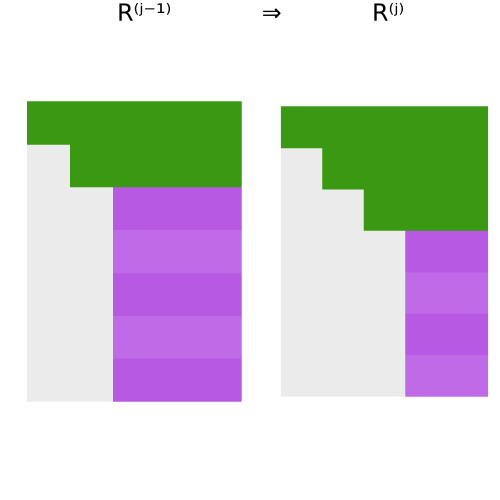

In [19]:
m = 7; n = 5; j = 2;
R = ones(m,n)
R[j:2:end,:] .-= 0.1
R[1:j,:] .= -1.0 + 0.01
for i in 1:j
    R[i+1:end,i] .= 0.
end
Rj = copy(R);
j += 1
R = ones(m,n)
R[j:2:end,:] .-= 0.1
R[1:j,:] .= -1.0 + 0.01
for i in 1:j
    R[i+1:end,i] .= 0.
end
Rjp1 = copy(R)
plot(imshow(Rj), imshow(Rjp1), colorbar=false, layout=(1,2), plot_title ="R⁽ʲ⁻¹⁾            ⇒            R⁽ʲ⁾")

- Let $x^{(j)}$ be the _tail_ of column $j$,

$$x^{(j)} = r_{j:m}^{(j-1)} \in \mathbb{C}^{m-(j-1)}$$

- Compute the Householder vector $u^{(j)}$ for $x^{(j)}$ that makes the unitary matrix
$\tilde{U}_j$

- Make $U_J$ by putting $\tilde{U}_j$ on lower diagonal block


$$
\begin{bmatrix}
& & & & & & \\
& & & & & & \\
& & & & & & \\
& & & U_j & & & \\
& & & & & & \\
& & & & & & \\
& & & & & & \\
\end{bmatrix}
=
\left[
\begin{array}{cccc|ccc}
1 & & & & & & \\
& 1 & & & & & \\
& & \ddots & & & & \\
& & & 1 & & & \\ \hline
& & & & & & \\
& & & & & \tilde{U}_j & \\
& & & & & & \\
\end{array}
\right]
$$

### All together

In [20]:
function householder_literal(A)
    m, n = size(A)
    Q = Matrix{eltype(A)}(I, m, m)
    R = copy(A)
    for i = 1:n
        x = R[i:m,i]
        u = householder_vector(x)
        R[i:m,i:n] = householder_reflect(u, R[i:m,i:n]) # apply reflector to trailing rows of R to make r_i upper
        R[i+1:m,i] .= 0
        Q[:,i:m] = householder_reflect_left(Q[:,i:m], u) # apply reflector to trailing columns of Q to multiply in U_i
    end
    return Q, R
end

householder_literal (generic function with 1 method)

### Recall our tests from last time

In [21]:
reconstruction_error(A, Q, R) = norm(A - Q * R, 2)
orthonormality_error(Q) = norm(I - Q[:,:]' * Q[:,:], 2)
upper_triangularity_error(R) = norm(R - UpperTriangular(R), 2)
function qr_test(A, Q, R, recon_tol=1.e-12, ortho_tol=1.e-12, triu_tol=0.0)
    m, n = size(A)
    p = min(m,n)
    recon_err = reconstruction_error(A, Q, R)
    ortho_err = orthonormality_error(Q)
    triu_err = upper_triangularity_error(R[1:p,1:p])
    println("Reconstruction error || A - Q R ||_F = $recon_err")
    println("Orthonormality error || I - Q'Q ||_F = $ortho_err")
    println("Upper-triangularity error || R - triu(R) ||_F = $triu_err")
    return (recon_err <= recon_tol) && (ortho_err <= ortho_tol) && (triu_err <= triu_tol) 
end

qr_test (generic function with 4 methods)

In [22]:
m = 7; n = 5;
A = randn(m, n)
Q, R = householder_literal(A);
qr_test(A, Q, R)

Reconstruction error || A - Q R ||_F = 1.4841177781909822e-15
Orthonormality error || I - Q'Q ||_F = 7.203899111307078e-16
Upper-triangularity error || R - triu(R) ||_F = 0.0


true

### `householder_literal` is on par with `qr`

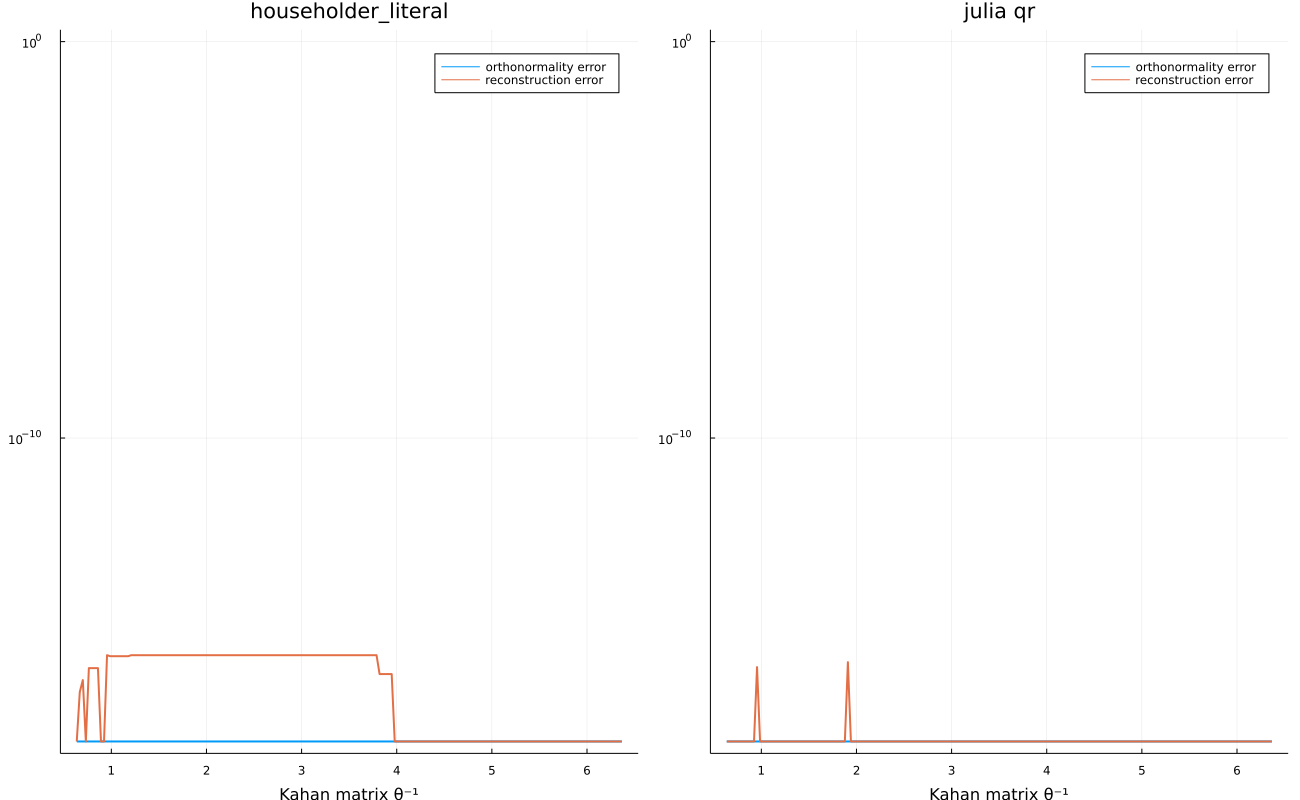

In [23]:
ortho_errs_hh = Float64[]
recon_errs_hh = Float64[]
ortho_errs_qr = Float64[]
recon_errs_qr = Float64[]
rang = π ./ (2:.1:20)
for θ in rang
    M = kahan(10, θ)
    ϕ = eps(Float64)
    M_p = copy(M[:,:])
    rot = [cos(ϕ) sin(ϕ); -sin(ϕ) cos(ϕ)]
    M_p[1:2,:] = rot * M[1:2,:]
    Q_hh, R_hh = householder_literal(M_p)
    Q_qr, R_qr = qr(M_p)
    push!(ortho_errs_hh, orthonormality_error(Q_hh))
    push!(recon_errs_hh, reconstruction_error(M_p, Q_hh, R_hh))
    push!(ortho_errs_qr, orthonormality_error(Q_qr))
    push!(recon_errs_qr, reconstruction_error(M_p, Q_qr, R_qr))
end
ymin=Inf
ymax=0.
for series in [ortho_errs_hh, ortho_errs_hh, recon_errs_qr, recon_errs_qr]
    series[:] = max.(series[:], 0.001*eps())
    ymin = min(ymin, minimum(series))
    ymax = max(ymax, maximum(series))
end
ylo = eps()*0.01
ymin = max(ymin, ylo)
ymin *= 0.5
ymax *= 2.0
p1 = plot( rang .^-1, [max.(ylo,ortho_errs_hh) max.(ylo,recon_errs_hh)]
    , yscale=:log10
    , label=["orthonormality error" "reconstruction error"]
    , xlabel="Kahan matrix θ⁻¹"
    , title="householder_literal"
    , size=(1300,800)
    , ylim=(ymin,2.0)
)
p2 = plot( rang .^-1, [max.(ylo,ortho_errs_qr) max.(ylo,recon_errs_qr)]
    , yscale=:log10
    , label=["orthonormality error" "reconstruction error"]
    , xlabel="Kahan matrix θ⁻¹"
    , title="julia qr"
    , size=(1300,800)
    , ylim=(ymin,2.0)
)
draw(plot(p1,p2,layout=(1,2)))

## Householder QR performance

### Work of applying one reflector

- The work of applying

  $$v \gets v - 2 u (u^*v) = v - u (2*(u^*v))$$

  is just one more flop than the work of applying a projection

  $$v \gets v - u (u^* v).$$
  
  This is $4 m$ flops if $u \in \mathbb{C}^m$.

- If we apply the reflector to a matrix $A \in \mathbb{C}^{m \times k}$, the work is $4mk$.

In [20]:
function householder_literal(A)
    m, n = size(A)
    Q = Matrix{eltype(A)}(I, m, m)
    R = copy(A)
    for i = 1:n
        x = R[i:m,i]                                     # x has length (m - (i-1))
        u = householder_vector(x)                        # O(m - (i-1)) (lower order term)
        R[i:m,i:n] = householder_reflect(u, R[i:m,i:n])  # length: (m - (i-1)); # vectors: (n - (i-1)) ⇒ 4(m-(i-1))(n-(i-1))
        R[i+1:m,i] .= 0                                  # ignore
        Q[:,i:m] = householder_reflect_left(Q[:,i:m], u) # length: (m - (i-1)); # vectors: m ⇒ 4(m-(i-1))m
    end
    return Q, R
end

householder_literal (generic function with 1 method)

- Work applying reflectors to $R$:

  $$\sum_{i=1}^n 4(m-(i-1))(n-(i-1)) = \text{(change of variable)} \sum_{k=1}^n 4(k + (m-n))k$$
  $$ = \frac{4}{3} n^3 + 2 (m - n) n^2 + \text{lower order terms} = 2 mn^2 -\frac{2}{3} n^3 + \text{l.o.t.}$$

- Work building $Q$: $\sum_{i=1}^n 4 m(m -(i-1)) = 4m \sum_{k=1}^n k + (m-n) = 4m^2 n - 2mn^2 + \text{l.o.t.}$ 

### Building $Q$ ($O(m^2n)$) is more expensive than builiding $R$ ($O(mn^2)$), so avoid it

- Collect the reflectors $\{u_1, \dots, u_n\}$ (total cost of constructing all these: $O(mn)$)

- The vectors are often stored in the _lower trapezoidal part_ of a 2D array $U$

- $U_i$s were accumulated into $Q$ on the right,

  $$Q = U_1 \cdot U_2 \cdot \cdots \cdot U_n,$$
  
  so apply the reflectors in reverse order to apply $Q$,
  
  $$Qv = U_1 (U_2 ( \cdots ( U_n v ) \cdots )).$$

In [25]:
function apply_Q(U, v)
    m, n = size(U)
    y = copy(v)
    for i in n:-1:1
        y[i:end] -= U[i:end,i] * (2 * (U[i:end,i]' * y[i:end]))
    end
    return y
end

apply_Q (generic function with 1 method)

- To apply $Q^*$,

  $$Q^* = U_n^* \cdot U_{n-1}^* \cdot \cdots \cdot U_1^*.$$
  
- But reflectors are hermitian, so to apply $Q^*$ apply reflectors in original order,

  $$Q^* v = U_n(U_{n-1}(\cdots(U_1 v) \cdots )).$$

In [26]:
function apply_Qstar(U, v)
    m, n = size(U)
    y = copy(v)
    for i in 1:n
        y[i:end] -= U[i:end,i] * (2 * (U[i:end,i]' * y[i:end]))
    end
    return y
end

apply_Qstar (generic function with 1 method)

### Non-literal Householder QR: return reflectors $U$ with $R$

In [28]:
function householder_qr(A)
    m, n = size(A)
    U = zeros(eltype(A), m, n)
    R = copy(A)
    for i = 1:n
        U[i:m,i] = householder_vector(R[i:m,i])
        R[i:m,i:n] = householder_reflect(U[i:m,i], R[i:m,i:n])
        R[i+1:m,i] .= 0
    end
    return U, R
end

householder_qr (generic function with 1 method)

In [30]:
m = 100; n = 50;
A = randn(m, n);
Q, R_lit = householder_literal(A)
U, R_hh = householder_qr(A)
norm(R_lit - R_hh, 2)

0.0

In [31]:
v = randn(m)
Qv_lit = Q * v
Qv_hh = apply_Q(U,v)
norm(Qv_lit - Qv_hh, 2)

5.724600349716601e-15

In [32]:
Qstarv_lit = Q' * v
Qstarv_hh = apply_Qstar(U,v)
norm(Qstarv_lit - Qstarv_hh, 2)

6.0032621696324895e-15

### `householder_qr` is very close to `qr`

- The `LinearAlgebra.QRCompactWY` type of `qr().Q` is essentially the matrix $U$ containing the reflectors

- The [LAPACK `*geqrf` fortran routines](http://netlib.org/lapack/lapack-3.1.1/html/dgeqrf.f.html) that higher-level languages call also are essentially Householder QR, but they pack (most of) $U$ and $R$ into the same output array:

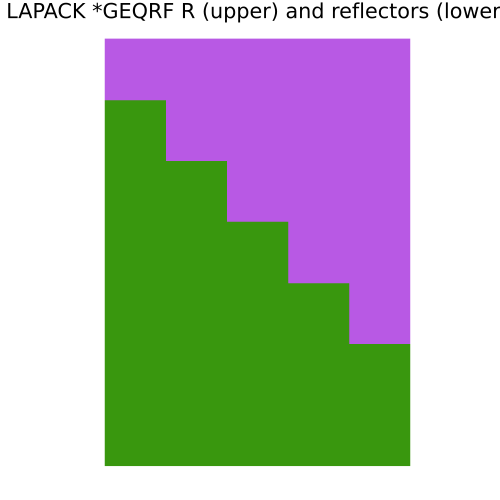

In [35]:
m = 7; n = 5;
A = ones(m,n)
for i = 1:n
    A[i+1:end,i] .= -1.0
end
p = imshow(A)
plot!(p, colorbar=false, title = "LAPACK *GEQRF R (upper) and reflectors (lower)")

### Notes on HW2, problem 5

The point is to see that for some triangular matrices the singular values are very different from the diagonal values, using the example of a particular _Toeplitz_ (constant diagonals) matrix.

- Part (a): straightforward given previous work on triangular matrices in lectures and homework 1.
- Part (b): guess that $A^{-1}$ is _also_ Toeplitz; determine what each diagonal must be; check that it is the inverse.
- Part (c): How does $\|A^{-1}\|_2$ relate to the smallest singular value of $A$? Consider $\|A^{-1} e_k\|_2$ for different choices of $k$.